# Perfil de Intensidad

En este documento se segmentan las imagenes en 5 porciones cada una.

In [14]:
# Importamos las librerias necesarias
import cv2
from PIL import Image
from pylab import * 
import numpy as np
import pandas as pd
from skimage.exposure import histogram as imhist
from skimage.color import rgb2gray 
import matplotlib.pyplot as plt

# Analisis para una sola imagen

In [15]:
# Cargamos imagen, se convierte a matriz
image = imread('../intensidad/B13.png')
# Utilizamos shape para conocer las propiedades de nuestra matriz
print(image.shape)

(1024, 1280, 4)


En este caso la imagen tiene una resolución de 1024 x 1280 pixeles y cuenta con 4 dimensiones, tres de color RGB y una transparente.

In [16]:
# Nos aseguramos que la imagen sea un array de NumPy
image = np.array(image)

# Verificamos si la imagen tiene 4 canales
if image.shape[-1] == 4:
    # Elimina el canal alfa
    image = image[..., :3]

In [17]:
# Convertimos la imagen a escala de grises
image = rgb2gray(image)

print(type(image))

# Shape of the image
print("Shape of the image", image.shape)

<class 'numpy.ndarray'>
Shape of the image (1024, 1280)


### Recortamos la imagen

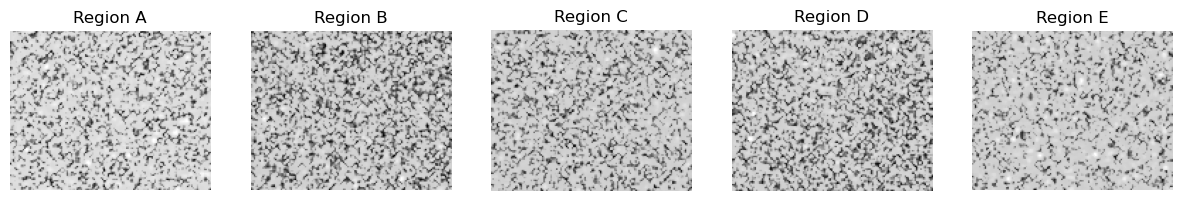

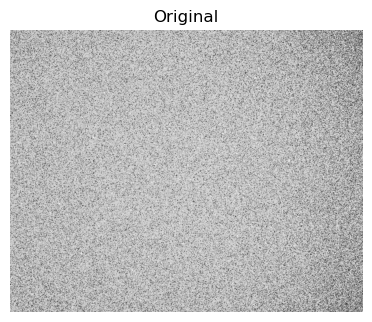

In [18]:
# Dimensiones de la imagen
rows, cols = image.shape

# Dimensiones de cada una de las 9 regiones principales (3x3)
region_height = rows // 3
region_width = cols // 3

# Función para obtener la subdivisión central de una región dada
def get_central_subdivision(region):
    sub_height = region.shape[0] // 3
    sub_width = region.shape[1] // 3
    return region[sub_height:2*sub_height, sub_width:2*sub_width]

# Extraemos las 9 regiones principales
region_1 = image[0:region_height, 0:region_width]
region_2 = image[0:region_height, region_width:2*region_width]
region_3 = image[0:region_height, 2*region_width:cols]
region_4 = image[region_height:2*region_height, 0:region_width]
region_5 = image[region_height:2*region_height, region_width:2*region_width]
region_6 = image[region_height:2*region_height, 2*region_width:cols]
region_7 = image[2*region_height:rows, 0:region_width]
region_8 = image[2*region_height:rows, region_width:2*region_width]
region_9 = image[2*region_height:rows, 2*region_width:cols]

# Obtenemos las subdivisiones centrales de las esquinas y la central de la región central
region_A = get_central_subdivision(region_1)
region_B = get_central_subdivision(region_3)
region_C = get_central_subdivision(region_7)
region_D = get_central_subdivision(region_9)
region_E = get_central_subdivision(region_5)

# Mostrar las regiones A, B, C, D y E
plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.title('Region A')
plt.imshow(region_A, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title('Region B')
plt.imshow(region_B, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title('Region C')
plt.imshow(region_C, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title('Region D')
plt.imshow(region_D, cmap='gray')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title('Region E')
plt.imshow(region_E, cmap='gray')
plt.axis('off')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.show()
 

### Obtenemos el histograma para una de las regiones

Codigo para una region 

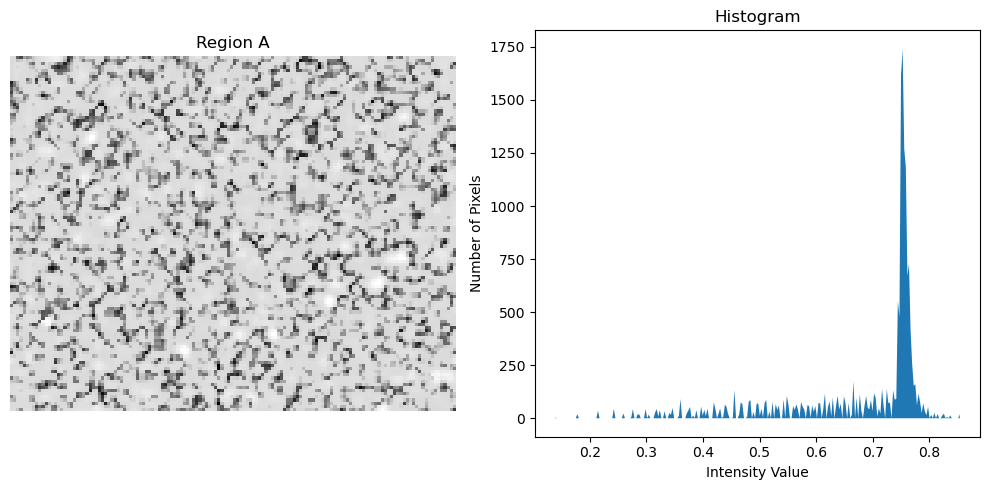

Promedio de intensidad: 0.6830291748046875
Punto máximo en valor de número de píxeles: 1741
Máximo de intensidad: 0.7526376247406006


In [19]:
# Obtenemos el histograma
hist_image, bins_image = imhist(region_A)

# Visualizamos la región y su histograma
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Region A')
plt.imshow(region_A, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Histogram')
plt.fill_between(bins_image, hist_image)
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')

plt.tight_layout()
plt.show()

# Calculamos el promedio de intensidad
average_intensity = region_A.mean()

# Encontramos el valor máximo de número de píxeles y su correspondiente intensidad
max_pixel_value = hist_image.max()
max_intensity_value = bins_image[hist_image.argmax()]

# Mostrar los resultados
print(f'Promedio de intensidad: {average_intensity}')
print(f'Punto máximo en valor de número de píxeles: {max_pixel_value}')
print(f'Máximo de intensidad: {max_intensity_value}')

Codigo para las 5 regiones 

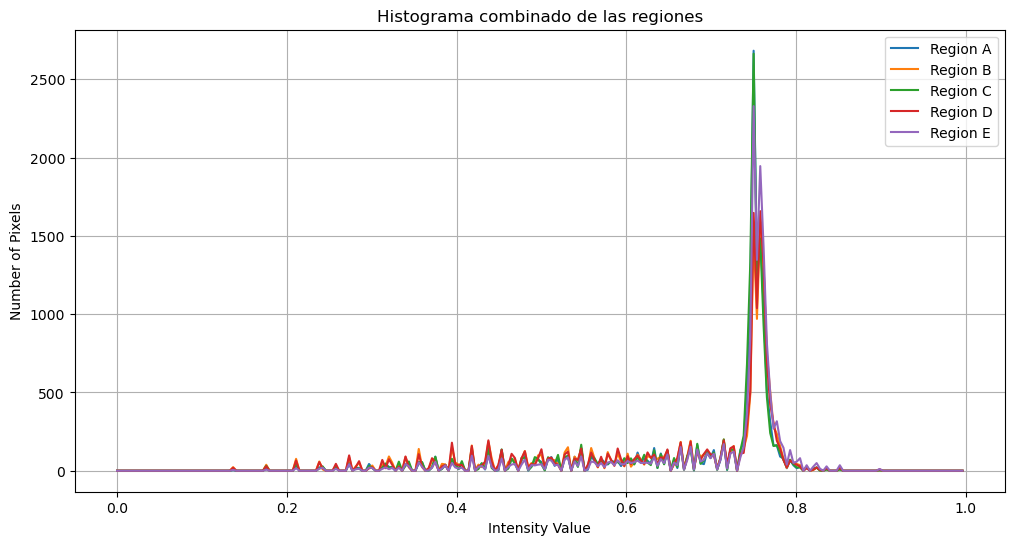

     Region  Promedio de Intensidad  Máximo de Píxeles  Máximo de Intensidad
0  Region A                0.683029               2683              0.750000
1  Region B                0.657802               1584              0.757812
2  Region C                0.680564               2664              0.750000
3  Region D                0.659824               1658              0.757812
4  Region E                0.704436               2329              0.750000


In [20]:
# Función para calcular el histograma
def imhist(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,1])
    return hist, bins[:-1]

# Inicializamos listas para almacenar los datos
histograms = []
bins = None
averages = []
max_pixel_values = []
max_intensity_values = []

regions = [region_A, region_B, region_C, region_D, region_E]
region_names = ['Region A', 'Region B', 'Region C', 'Region D', 'Region E']

# Procesamos cada región
for region in regions:
    hist_image, bins_image = imhist(region)
    histograms.append(hist_image)
    averages.append(region.mean())
    
    # Encontramos el valor máximo de número de píxeles y su correspondiente intensidad
    max_pixel_value = hist_image.max()
    max_intensity_value = bins_image[hist_image.argmax()]
    max_pixel_values.append(max_pixel_value)
    max_intensity_values.append(max_intensity_value)

# Visualizamos el histograma combinado
plt.figure(figsize=(12, 6))
for i, hist in enumerate(histograms):
    plt.plot(bins_image, hist, label=f'{region_names[i]}')

plt.title('Histograma combinado de las regiones')
plt.xlabel('Intensity Value')
plt.ylabel('Number of Pixels')
plt.legend()
plt.grid(True)
plt.show()

# Crear un DataFrame con los resultados
df_stats = pd.DataFrame({
    'Region': region_names,
    'Promedio de Intensidad': averages,
    'Máximo de Píxeles': max_pixel_values,
    'Máximo de Intensidad': max_intensity_values
})

# Mostrar el DataFrame
print(df_stats)


# Analisis para todas la imagenes en cada segmento

In [21]:
# Lista para almacenar los resultados
results = []

# Nombres de las regiones
region_names = ['Region A', 'Region B', 'Region C', 'Region D', 'Region E']

# Recorremos las imágenes desde B0 hasta B36
for i in range(37):
    # Formateamos el nombre de la imagen
    img_path = f'../intensidad/B{i}.png'
    # Cargamos la imagen
    image = imread(img_path)
    
    # Verificamos si la imagen tiene 4 canales y eliminamos el canal alfa si es necesario
    if image.shape[-1] == 4:
        image = image[..., :3]
    
    # Convertimos la imagen a escala de grises
    image = rgb2gray(image)
    
    # Dimensiones de la imagen
    rows, cols = image.shape
    region_height = rows // 3
    region_width = cols // 3
    
    # Función para obtener la subdivisión central de una región dada
    def get_central_subdivision(region):
        sub_height = region.shape[0] // 3
        sub_width = region.shape[1] // 3
        return region[sub_height:2*sub_height, sub_width:2*sub_width]
    
    # Extraemos las 9 regiones principales
    region_1 = image[0:region_height, 0:region_width]
    region_2 = image[0:region_height, region_width:2*region_width]
    region_3 = image[0:region_height, 2*region_width:cols]
    region_4 = image[region_height:2*region_height, 0:region_width]
    region_5 = image[region_height:2*region_height, region_width:2*region_width]
    region_6 = image[region_height:2*region_height, 2*region_width:cols]
    region_7 = image[2*region_height:rows, 0:region_width]
    region_8 = image[2*region_height:rows, region_width:2*region_width]
    region_9 = image[2*region_height:rows, 2*region_width:cols]
    
    # Obtenemos las subdivisiones centrales de las esquinas y la central de la región central
    region_A = get_central_subdivision(region_1)
    region_B = get_central_subdivision(region_3)
    region_C = get_central_subdivision(region_7)
    region_D = get_central_subdivision(region_9)
    region_E = get_central_subdivision(region_5)
    
    regions = [region_A, region_B, region_C, region_D, region_E]
    
    # Procesamos cada región
    for j, region in enumerate(regions):
        # Obtenemos el histograma
        hist_image, bins_image = imhist(region)
        
        # Calculamos el promedio de intensidad
        average_intensity = region.mean()
        
        # Encontramos el valor máximo de número de píxeles y su correspondiente intensidad
        max_pixel_value = hist_image.max()
        max_intensity_value = bins_image[hist_image.argmax()]
        
        # Guardamos los resultados en la lista
        results.append({
            'Image': f'B{i}.png',
            'Region': region_names[j],
            'Average Intensity': average_intensity,
            'Max Pixel Value': max_pixel_value,
            'Max Intensity': max_intensity_value
        })

# Convertimos los resultados a un DataFrame
df = pd.DataFrame(results)

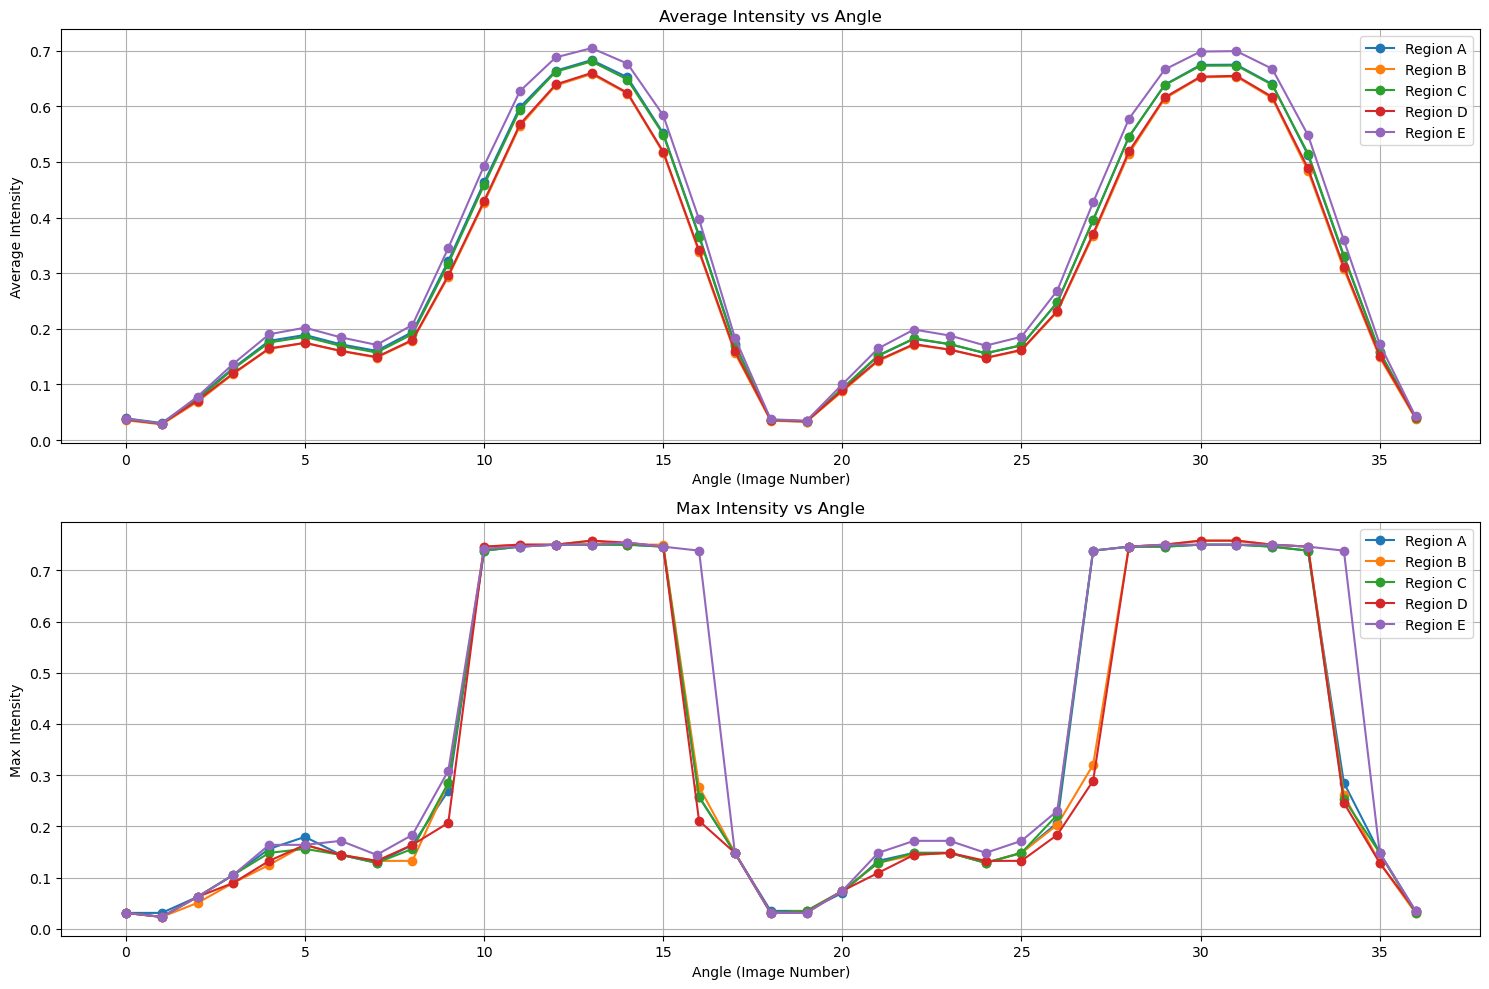

       Image    Region  Average Intensity  Max Pixel Value  Max Intensity
0     B0.png  Region A           0.038960             4911       0.031250
1     B0.png  Region B           0.035549             5942       0.031250
2     B0.png  Region C           0.037151             6278       0.031250
3     B0.png  Region D           0.037018             6574       0.031250
4     B0.png  Region E           0.038517             5303       0.031250
..       ...       ...                ...              ...            ...
180  B36.png  Region A           0.041240             4430       0.035156
181  B36.png  Region B           0.038264             5561       0.031250
182  B36.png  Region C           0.039924             4821       0.031250
183  B36.png  Region D           0.041052             5077       0.035156
184  B36.png  Region E           0.042432             3894       0.035156

[185 rows x 5 columns]


In [22]:

# Graficamos el promedio de intensidad y el máximo de intensidad para cada región
angles = range(37)
plt.figure(figsize=(15, 10))

for region_name in region_names:
    df_region = df[df['Region'] == region_name]
    
    plt.subplot(2, 1, 1)
    plt.plot(angles, df_region['Average Intensity'], marker='o', label=region_name)
    plt.xlabel('Angle (Image Number)')
    plt.ylabel('Average Intensity')
    plt.title('Average Intensity vs Angle')
    
    plt.subplot(2, 1, 2)
    plt.plot(angles, df_region['Max Intensity'], marker='o', label=region_name)
    plt.xlabel('Angle (Image Number)')
    plt.ylabel('Max Intensity')
    plt.title('Max Intensity vs Angle')

plt.subplot(2, 1, 1)
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar el DataFrame
print(df)


# Codigo anterior

In [23]:
# img = cv2.imread("../intensidad/B0.png")
# cropped = img[1 : 1 + 1, 2 : 2 + 1]
# cv2.imshow("cropped", cropped)

In [24]:
# cv2.imshow('original', image)
# cv2.imshow('cropped', crop)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [25]:
# Cargar la imagen
# imagen_original = Image.open('../intensidad/B13.png')

# Definir las dimensiones del recorte
# a es ancho, b es alto
# a, b = imagen_original.size

# coor = {izquierda := a / 4,
# superior := b / 4,
# derecha :=  3 * a / 4,
# inferior := 3 * b / 4}
 
# Realizar el recorte
# imagen_recortada = imagen_original.crop(coor)

# Guardar la imagen recortada
# imagen_recortada.save('../intensidad/B13_1.png')


In [26]:
# Mostrar la imagen original y la imagen recortada
#plt.figure(figsize=(10, 5))
#plt.subplot(1, 2, 1)
#plt.title('Original')
#plt.imshow(image, cmap='gray')
#plt.axis('off')

#plt.subplot(1, 2, 2)
#plt.title('Cropped')
#plt.imshow(crop, cmap='gray')
#plt.axis('off')

#plt.show()

In [27]:
#print(type(image))
  
# Shape of the image
#print("Shape of the image", image.shape)
  
# [rows, columns]
#crop = image[50:180, 100:300]  